In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yfin
import constants as cs
import Dates as dates 
import payoff as pf
import VarianceRedFunc as vr 
import GBM as gbm 
import warnings
warnings.filterwarnings("ignore")

%reload_ext autoreload
%autoreload 2

In [48]:
def getdata():
    data = yfin.download(['LONN.SW', 'SIKA.SW'], period= 'max')['Adj Close']
    data.index = data.index.tz_localize(None)
    data = data.loc[cs.initial_fixing_date: cs.final_fixing_date]
    return data 

data = getdata()
data

[*********************100%***********************]  2 of 2 completed


Ticker,LONN.SW,SIKA.SW
Date,,
2023-04-27,542.120544,237.429871
2023-04-28,546.263306,242.368103
2023-05-02,545.868835,239.800232
2023-05-03,574.079590,241.479218
2023-05-04,572.895935,242.071823
...,...,...
2024-07-24,522.599976,262.000000
2024-07-25,559.799988,258.500000
2024-07-26,581.000000,262.000000


Length of date_list: 315
Number of time steps (num_steps): 315


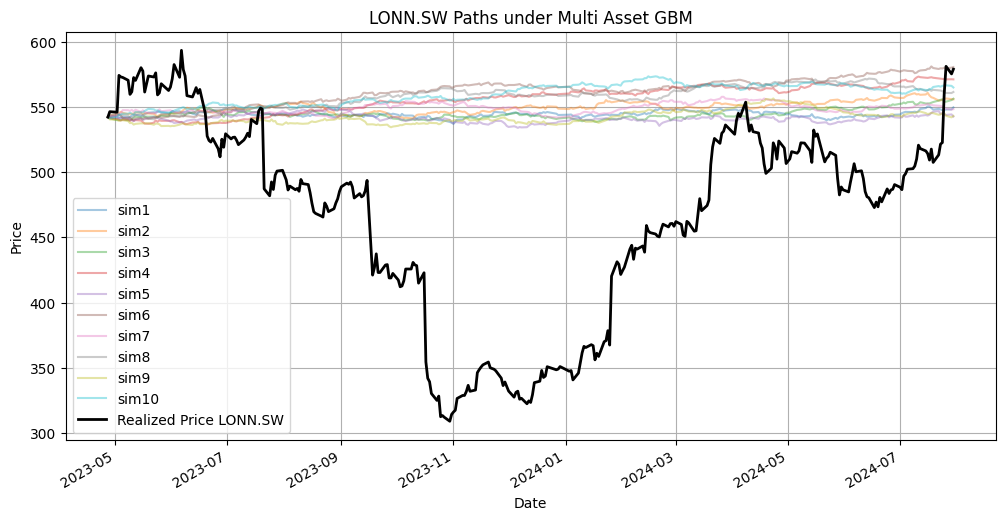

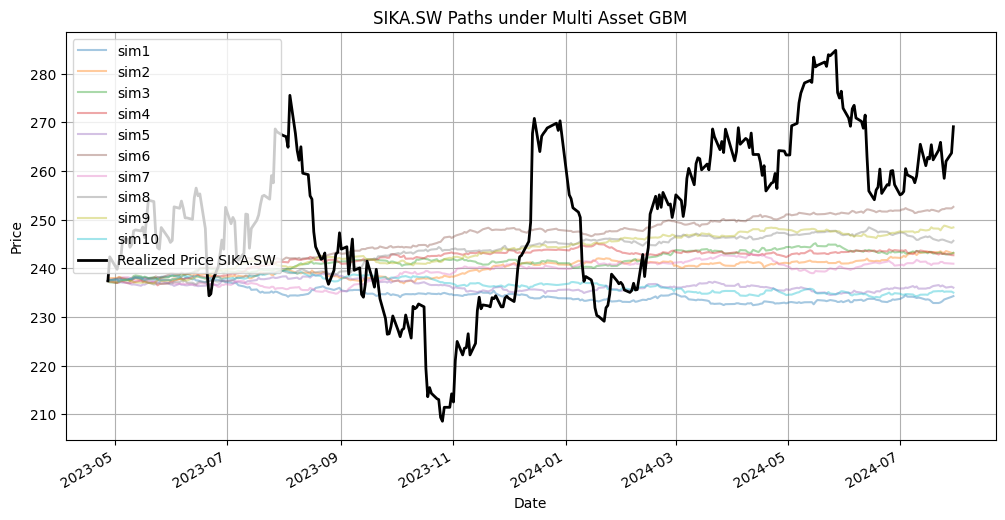

Asset          LONN.SW                                                  \
Simulation        sim1        sim2        sim3        sim4        sim5   
2023-04-27  542.120544  542.120544  542.120544  542.120544  542.120544   
2023-04-28  542.132259  543.572146  541.156374  541.229979  542.744931   
2023-05-02  541.266484  544.366964  539.773965  540.731831  542.837575   
2023-05-03  541.684215  545.129246  540.007077  539.997595  541.196688   
2023-05-04  541.697056  546.163934  539.729858  539.566088  541.301319   
...                ...         ...         ...         ...         ...   
2024-07-24  547.352847  555.509119  555.684725  571.312160  544.903132   
2024-07-25  547.660939  555.847907  553.883065  571.264407  544.134542   
2024-07-26  547.885135  556.372281  553.916272  571.025219  543.765628   
2024-07-29  548.028304  555.885555  555.170580  571.106575  544.157177   
2024-07-30  549.529170  555.695414  556.192514  571.017334  542.544456   

Asset                                                                   \
Simulation        sim6        sim7        sim8        sim9       sim10   
2023-04-27  542.120544  542.120544  542.120544  542.120544  542.120544   
2023-04-28  542.454489  542.880061  543.209930  540.325691  541.341143   
2023-05-02  543.298872  543.431841  544.642376  540.052350  542.502334   
2023-05-03  544.028964  544.515006  543.848675  539.162907  544.066153   
2023-05-04  543.366293  545.098662  543.164768  539.614671  544.116592   
...                ...         ...         ...         ...         ...   
2024-07-24  579.356751  550.075971  562.010258  545.110514  566.041100   
2024-07-25  579.911712  548.897006  561.207329  545.014627  566.280819   
2024-07-26  579.478554  548.594364  560.589542  543.097451  566.416409   
2024-07-29  579.968647  547.850926  560.551258  541.937064  566.034181   
2024-07-30  580.430809  548.202401  561.349467  542.998406  564.807585   

Asset          SIKA.SW                                                  \
Simulation        sim1        sim2        sim3        sim4        sim5   
2023-04-27  237.429871  237.429871  237.429871  237.429871  237.429871   
2023-04-28  237.562695  237.988384  237.141111  237.321111  237.548693   
2023-05-02  237.260479  238.033852  236.996560  236.992925  237.783235   
2023-05-03  237.686308  238.262245  237.371460  237.139324  237.087080   
2023-05-04  237.912572  238.138919  237.334747  237.347246  237.155726   
...                ...         ...         ...         ...         ...   
2024-07-24  233.248299  243.236179  242.962562  242.971959  236.485698   
2024-07-25  233.605216  243.224807  242.967077  243.013666  236.258480   
2024-07-26  233.736579  243.562254  242.847318  242.981282  236.054801   
2024-07-29  234.143690  243.183599  243.000667  242.729264  236.225356   
2024-07-30  234.302741  243.135781  243.195120  242.703165  236.039797   

Asset                                                                   
Simulation        sim6        sim7        sim8        sim9       sim10  
2023-04-27  237.429871  237.429871  237.429871  237.429871  237.429871  
2023-04-28  237.483971  237.358433  237.709546  237.295194  237.533280  
2023-05-02  237.915003  237.415133  237.764167  237.264844  237.713373  
2023-05-03  238.108618  237.368151  237.885557  237.231576  237.302331  
2023-05-04  238.062977  237.529907  237.827113  237.489381  237.596953  
...                ...         ...         ...         ...         ...  
2024-07-24  252.158670  241.323415  245.916431  248.384942  235.388512  
2024-07-25  252.183311  241.079231  245.815781  248.780551  235.174299  
2024-07-26  252.340790  241.061098  245.655133  248.685510  235.241078  
2024-07-29  252.321340  240.971497  245.280261  248.298814  235.226678  
2024-07-30  252.638051  240.957745  245.662778  248.418332  235.023497  

[315 rows x 20 columns]

In [50]:
sim_data_combined = gbm.multi_asset_gbm_n_sims(data = data, nsims = cs.n_sims, fdos = cs.initial_fixing_date, plot = False, plotasset=True)
sim_data_combined

In [52]:
lonza_path = sim_data_combined['LONN.SW']  # DataFrame with simulations as columns
sika_path = sim_data_combined['SIKA.SW']

In [54]:
params_product = {
    'Denomination': 1000,
    'Coupon_Rate': (0.08 / 4) ,  # Quarterly coupon payments
}

In [69]:
payoff_gbm = pf.payoff(lonza_path, sika_path, params_product, cs.initial_fixing_date)
expected_payoff = np.mean(payoff_gbm)
r = cs.interest_rate  # Use the same interest rate as in the simulation
T_discount = dates.num_business_days(cs.initial_fixing_date, cs.final_fixing_date) / 252  # Time in years
present_value = expected_payoff * np.exp(-(r) * T_discount)
present_value



np.float64(1067.6633193286914)

# Control Variate 

In [73]:
theta_cv = vr.cv(data = data, lonza_path=lonza_path, sika_path=sika_path, fdos = cs.initial_fixing_date, payoffs_gbm=payoff_gbm)
present_value_cv = theta_cv * np.exp(-(r) * T_discount)
present_value_cv

[17.06618126 25.70269738 25.76071674 25.27970643 18.76459053 34.99355403
 23.57312028 28.17347148 30.86771836 17.77090137]
E_Y (Analytical Expected Value): 115.70440828431582
Mean of Simulated Control Variate Payoffs (bar_Y): 24.795265785288525
Correlation between X and Y: 0.1227
Beta (β) Coefficient: 0.22093861462232905
NaN in payoffs_gbm: False
Inf in payoffs_gbm: False
NaN in payoffs_control_variate: False
Inf in payoffs_control_variate: False
Variance Reduction Achieved: 1.51%
CV Estimate Payoff : 1112.0433746363806


np.float64(1087.301785363374)

In [77]:
import warnings
warnings.filterwarnings("ignore")
date_list = dates.get_list_dates(cs.initial_fixing_date, cs.final_fixing_date)
date_list = pd.Series(date_list)
date_list = date_list.head(10).tolist()

T = date_list
present_value_list = []
present_value_cv_list = []
for fdos in T:  
    print(f"Processing FDOS: {fdos}")

    # Run the simulation
    theta_cv = vr.cv(data = data, lonza_path=lonza_path, sika_path=sika_path, fdos = fdos, payoffs_gbm=payoff_gbm)

    # Compute expected payoff of CV 
    expected_payoff_cv= np.mean(theta_cv)
    # Discount to present value (assuming present value as of fdos)
    r = cs.interest_rate  # Use the same interest rate as in the simulation
    T_discount = dates.num_business_days(fdos, cs.final_fixing_date) / 252  # Time in years
    present_value = expected_payoff * np.exp(-(r) * T_discount)
    present_value_cv = present_value_cv = expected_payoff_cv * np.exp(-(r) * T_discount)
    print(f"Expected MC payoff at {fdos}", present_value)
    print(f"Expected CV payoff at {fdos}", present_value_cv)
    # Store the present value
    present_value_list.append(present_value)
    present_value_cv_list.append(present_value_cv)

Processing FDOS: 2023-04-27 00:00:00
[17.06618126 25.70269738 25.76071674 25.27970643 18.76459053 34.99355403
 23.57312028 28.17347148 30.86771836 17.77090137]
E_Y (Analytical Expected Value): 115.70440828431582
Mean of Simulated Control Variate Payoffs (bar_Y): 24.795265785288525
Correlation between X and Y: 0.1227
Beta (β) Coefficient: 0.22093861462232905
NaN in payoffs_gbm: False
Inf in payoffs_gbm: False
NaN in payoffs_control_variate: False
Inf in payoffs_control_variate: False
Variance Reduction Achieved: 1.51%
CV Estimate Payoff : 1112.0433746363806
Expected MC payoff at 2023-04-27 00:00:00 1089.2359246228057
Expected CV payoff at 2023-04-27 00:00:00 1087.301785363374
Processing FDOS: 2023-04-28 00:00:00
[15.44704861 24.08418165 24.14220515 23.66116048 17.14557921 33.37570195
 21.95445243 26.55513224 29.24957157 16.15181906]
E_Y (Analytical Expected Value): 115.09944793765784
Mean of Simulated Control Variate Payoffs (bar_Y): 23.176685236287646
Correlation between X and Y: 0.122

<Axes: xlabel='date'>

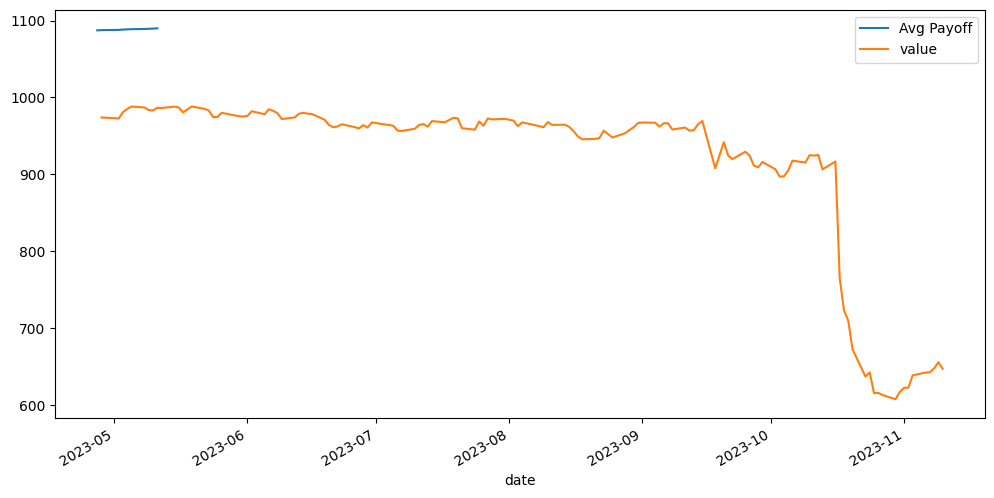

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
present_value_cv_df = pd.DataFrame({'Avg Payoff': present_value_cv_list}, index=T)
present_value_cv_df.plot(ax = ax)
import json 
productprice = pd.read_json(r'C:\Users\Admin\PycharmProjects\Simulation Techniques in Finance\.venv\MH4518\WY\product_price.json')
productprice.index = productprice['date']
productprice = productprice[['value']].sort_index()
productprice = productprice * 10
productprice.plot(ax =ax)